## SMART LENDER - APPLICANT CREDIBILITY PREDICTION FOR LOAN APPROVAL

    ''' 
    One of the most important factors which affect our country’s economy and financial condition is the credit 
    system governed by the banks. The process of bank credit risk evaluation is recognized at banks across 
    the globe. “As we know credit risk evaluation is very crucial, there is a variety of techniques are used 
    for risk level calculation. In addition, credit risk is one of the main functions of the banking community.

    The prediction of credit defaulters is one of the difficult tasks for any bank. But by forecasting the loan 
    defaulters, the banks definitely may reduce their loss by reducing their non-profit assets, so that recovery 
    of approved loans can take place without any loss and it can play as the contributing parameter of the bank 
    statement. This makes the study of this loan approval prediction important. Machine Learning techniques are
    very crucial and useful in the prediction of these types of data.
    
    A loan is a sum of money that is borrowed and repaid over a period of time, typically with interest. There
    are various types of loans available to individuals and businesses, such as personal loans, mortgages,
    auto loans, student loans, business loans and many more.They are offered by banks, credit unions, and
    other financial institutions, and the terms of the loan, such as interest rate, repayment period, and fees,
    vary depending on the lender and the type of loan.

    A personal loan is a type of unsecured loan that can be used for a variety of expenses such as home
    repairs, medical expenses, debt consolidation, and more. The loan amount, interest rate, and repayment
    period vary depending on the lender and the borrower's creditworthiness.To qualify for a personal loan,
    borrowers typically need to provide proof of income and have a good credit score.

    Predicting personal loan approval using machine learning analyses a borrower's financial data and credit
    history to determine the likelihood of loan approval. This can help financial institutions to make more
    informed decisions about which loan applications to approve and which to deny. 
    
    We will be using classification algorithms such as Decision tree, Random forest, KNN, and xgboost. 
    We will train and test the data with these algorithms. From this best model is selected and saved in pkl format. 
    We will be doing flask integration and IBM deployment'''

## DATA COLLECTION
  1. COLLECTING THE DATA

  2. IMPORTING THE LIBRARIES
  
  3. READ THE DATASET

In [1]:
# Importing the Necessary Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
# Reading the Dataset
# Importing the dataset which is in csv file

data = pd.read_csv('F:\VIT AP\DATA SCIENCE EXTERNSHIP\SmartIntern Data Science Project\Smart_Lender_Predicting_Loan_Approval\Dataset\loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Getting first five observations from the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Getting last five observations from the dataset
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Checking the size of the dataset
data.shape

(614, 13)

## DATA PREPARATION
   1. HANDLING MISSING VALUES

   2. HANDLING CATEGORICAL DATA
   
   3. HANDLING IMBALANCE DATA

In [6]:
# Handling the missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Checking the Null Values
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
# finding the sum of null values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

'''

    From the above code analysis, we can analyze that columns such as Gender, Married, Dependents,
    Self_Employed, LoanAmount, Loan_Amount_Term and Credit History are having the null values.

    Here the all the missing values in the columns belong to the categorical data.

    While Handling with missing values in the categorical data type, we will replace the missing
    values with the MODE (Most repeated value occurred) in the column.

    While Handling with missing values in the numerical data type, we will replace the missing
    values with the MEAN Value of that particular column.
'''

In [9]:
#Filling all Nan values with mode of respective variable
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

In [10]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS
1. VISUAL ANALYSIS

2. DESCRIPTIVE STATISTICAL

3. SCALING THE DATA

4. SPLITTING DATA INTO TRAIN AND TEST

UNIVARIATE ANALYSIS

In [11]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
# Importing plotly for visual analysis
import plotly.express as px
import plotly.figure_factory as ff
import plotly

C:\Users\thara\AppData\Local\Temp\ipykernel_17444\1608621340.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='b')
C:\Users\thara\AppData\Local\Temp\ipykernel_17444\1608621340.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


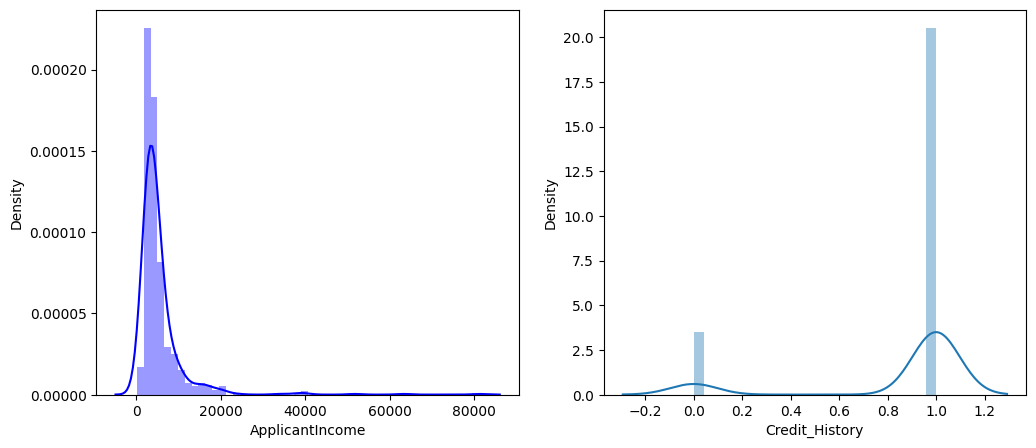

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='b')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

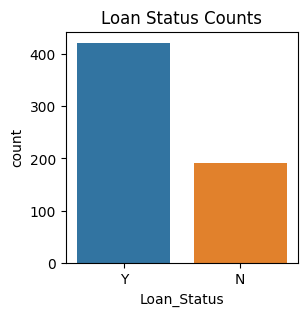

In [14]:
plt.figure(figsize=(3, 3))
# Create a countplot
sns.countplot(data=data, x='Loan_Status', order=data['Loan_Status'].value_counts().index)
plt.title('Loan Status Counts')
plt.show()


<Axes: ylabel='count'>

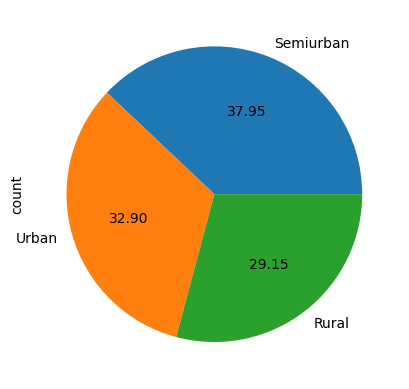

In [15]:
data['Property_Area'].value_counts().plot(kind='pie',autopct='%.2f')

BIVARIATE ANALYSIS

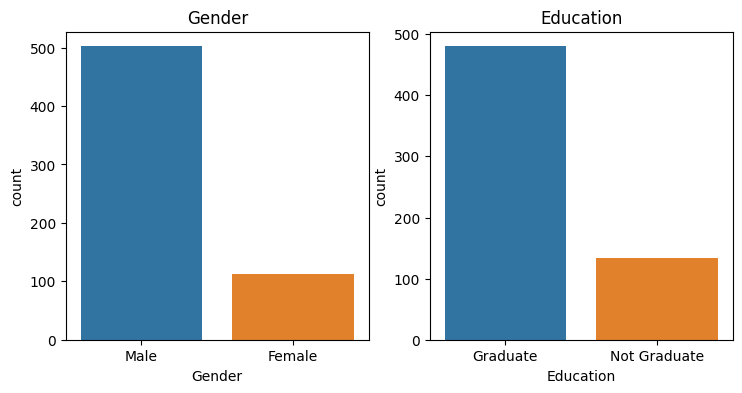

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))

# Subplot 1: Gender
plt.subplot(1, 4, 1)
sns.countplot(data=data, x='Gender')
plt.title('Gender')

# Subplot 2: Education
plt.subplot(1, 4, 2)
sns.countplot(data=data, x='Education')
plt.title('Education')

plt.show()


In [17]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

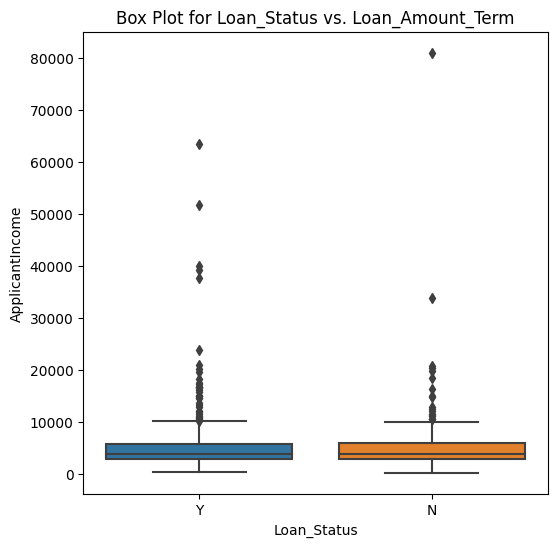

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.title('Box Plot for Loan_Status vs. Loan_Amount_Term')
plt.show()


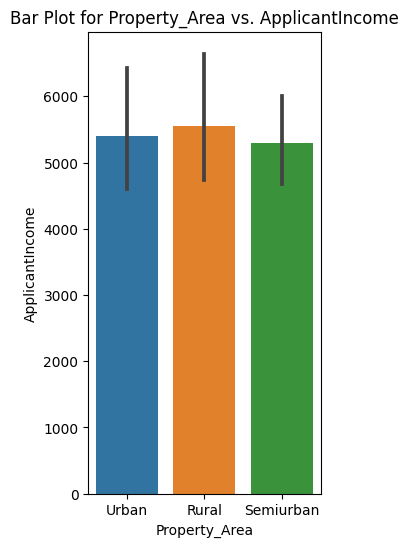

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 6))
sns.barplot(x='Property_Area', y='ApplicantIncome', data=data)
plt.title('Bar Plot for Property_Area vs. ApplicantIncome')
plt.show()


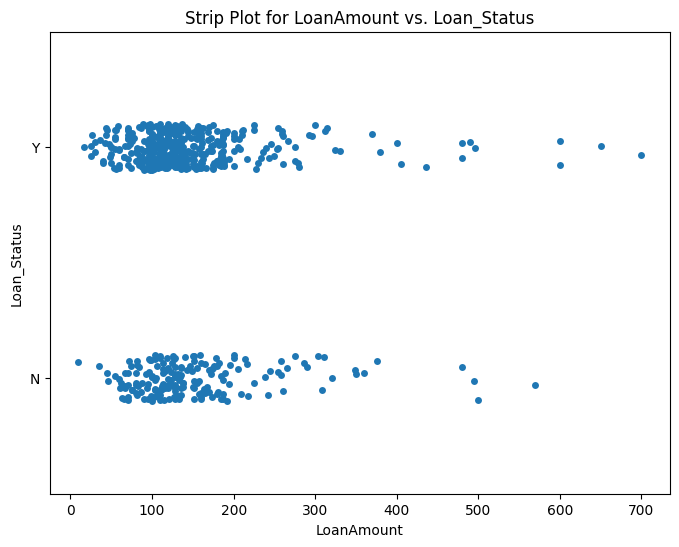

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.stripplot(x='LoanAmount', y='Loan_Status', data=data)
plt.title('Strip Plot for LoanAmount vs. Loan_Status')
plt.show()


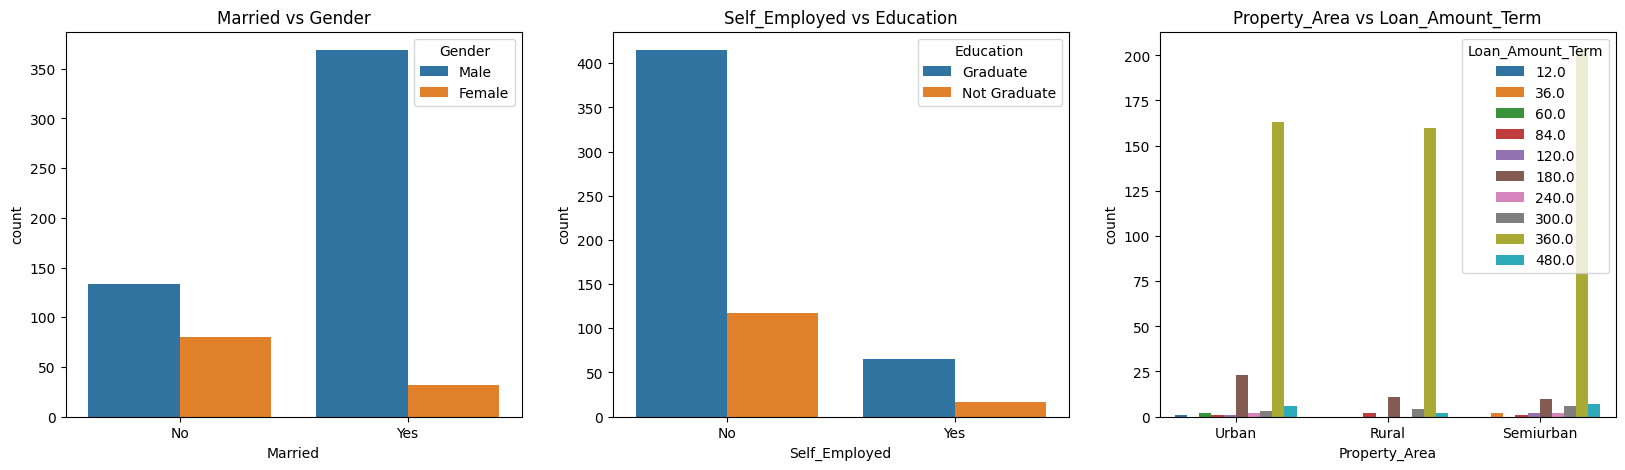

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'data' with your DataFrame
plt.figure(figsize=(20, 5))

# Subplot 1: Married vs Gender
plt.subplot(131)
sns.countplot(data=data, x="Married", hue="Gender")
plt.title("Married vs Gender")

# Subplot 2: Self_Employed vs Education
plt.subplot(132)
sns.countplot(data=data, x="Self_Employed", hue="Education")
plt.title("Self_Employed vs Education")

# Subplot 3: Property_Area vs Loan_Amount_Term
plt.subplot(133)
sns.countplot(data=data, x="Property_Area", hue="Loan_Amount_Term")
plt.title("Property_Area vs Loan_Amount_Term")

plt.show()


MULTIVARIATE ANALYSIS

C:\Users\thara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


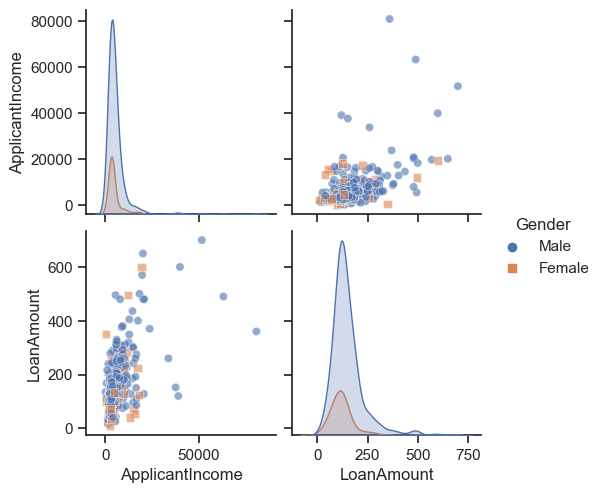

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.pairplot(data, hue="Gender", vars=['ApplicantIncome', 'LoanAmount'], diag_kind="kde", markers=["o", "s"], plot_kws={'alpha': 0.6})
plt.show()


C:\Users\thara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


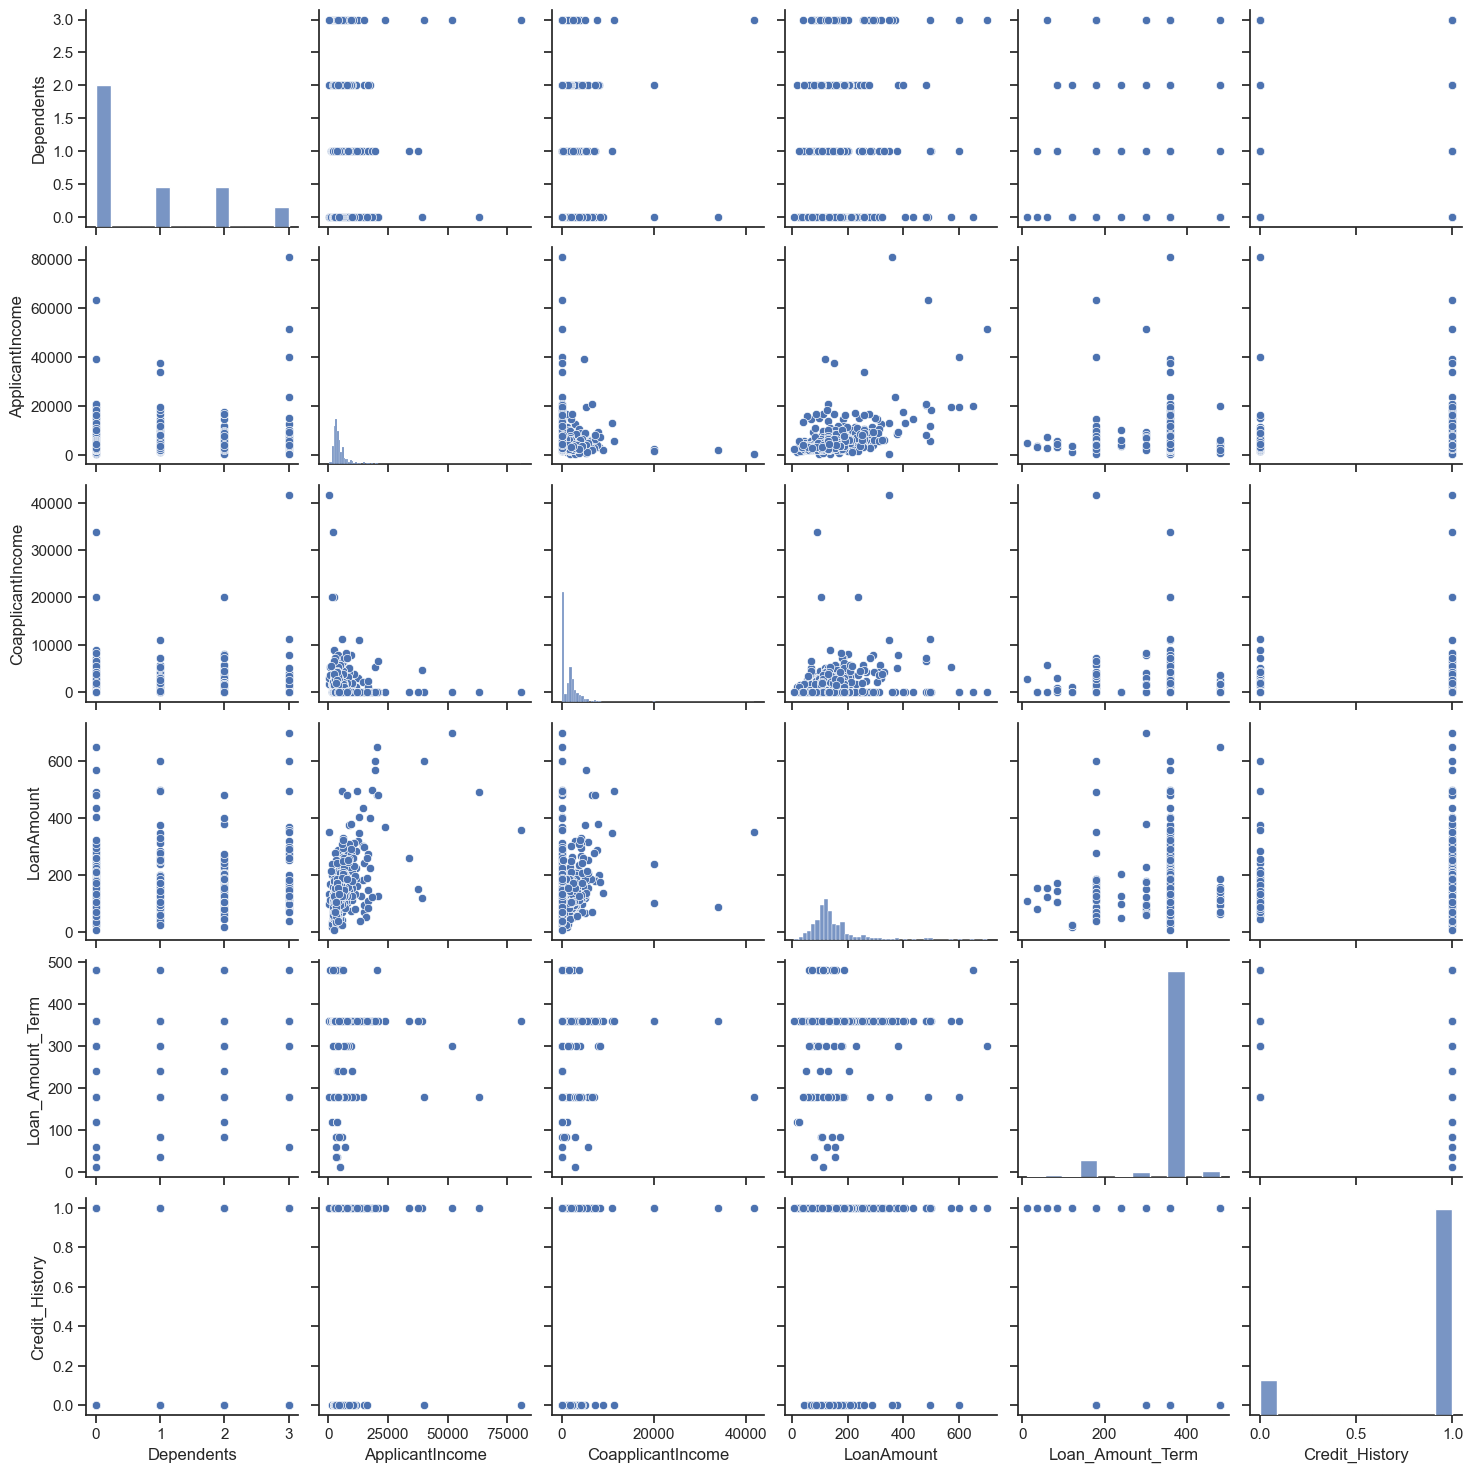

In [23]:
sns.pairplot(data)

In [24]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


 ## EDA > ONE HOT ENCODING >LABEL ENCODING > SCALING >SPLITING DATA INTO X AND Y > SPLITING INTO X-TRAIN AND Y-TRAIN > MODELS


'''

    In the dataset, We observe categorical data. So We must convert the categorical data to Integer
    Encoding or Binary Encoding.

    For Converting Categorical features to Numercical features we use Encoding Technique.

    There are several encoding techniques used, but here in the project we used Manual Encoding
    with the help of list comprehension.

'''

ONE-HOT ENCODING

In [25]:
# List of categorical columns for one-hot encoding
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


LABEL ENCODER

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

# Apply label encoding to the 'Loan_Status' column
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])


SCALING THE DATA

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Specify the columns to scale (assuming all columns need to be scaled)
columns_to_scale = ['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

# Fit and transform the data using the StandardScaler
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [28]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,-0.737806,0.072991,-0.554487,-0.211241,0.273231,1.0,1,True,False,False,False,False,True
1,LP001003,0.253470,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,True,True,False,False,False,False
2,LP001005,-0.737806,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,True,True,False,True,False,True
3,LP001006,-0.737806,-0.462062,0.251980,-0.306435,0.273231,1.0,1,True,True,True,False,False,True
4,LP001008,-0.737806,0.097728,-0.554487,-0.056551,0.273231,1.0,1,True,False,False,False,False,True


In [29]:
# Handling Imbalance Data
from imblearn.combine import SMOTETomek

In [30]:
smote = SMOTETomek(sampling_strategy=0.90)

In [31]:
# Dividing the data into dependent and independent y and x respectively
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status','Loan_ID'],axis=1)

In [32]:
data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [33]:
# creating a new x and y variables for the balanced set
X_resampled,Y_resampled = smote.fit_resample(x,y)

In [34]:
# printing the values of y before balancing the data and after
print(y.value_counts())
print(Y_resampled.value_counts())

Loan_Status
1    422
0    192
Name: count, dtype: int64
Loan_Status
1    392
0    349
Name: count, dtype: int64


SPLITTING DATA INTO TRAIN AND TEST

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.33, random_state=42)

In [36]:
X_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
114,-0.737806,-0.180775,0.134327,0.574111,0.273231,1.0,True,True,True,False,False,False
665,-0.737806,0.163292,-0.554487,-0.415697,0.273231,0.0,True,False,False,False,False,False
721,0.934376,0.519356,6.802746,2.422586,-0.687076,1.0,True,True,False,False,True,True
664,-0.737806,-0.520932,0.473169,-0.481895,0.273231,0.0,True,True,True,False,False,True
423,1.244745,-0.850820,0.443165,-0.568220,0.273231,1.0,False,True,True,False,True,False


In [37]:
X_train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [38]:
X_train.shape

(496, 12)

In [39]:
y_train.head()

114    1
665    0
721    0
664    0
423    1
Name: Loan_Status, dtype: int32

# MODEL BUILDING
1. TRAINING THE MODEL IN MULTIPLE ALGORITHMS

2. TESTING THE MODEL

In [40]:
# Decision Tree Model
def decisionTree(X_train,X_test,y_train,y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    yPred = dt.predict(X_test)
    print('***DecisionTreeClassifier***')
    print('Confusion Matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [41]:
# Random Forest Model
def randomForest(X_train,X_test,y_train,y_test):
    rfr = RandomForestClassifier()
    rfr.fit(X_train,y_train)
    yPred = rfr.predict(X_test)
    print('***RandomForestClassifier***')
    print('Confusion Matrix')
    print(confusion_matrix(y_test,yPred))
    print('classification_report')
    print(classification_report(y_test,yPred))

In [42]:
# KNN Model
def KNN(X_train,X_test,y_train,y_test):
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    yPred =knn.predict(X_test)
    print('***KNeighborsClassifer***')
    print('Confusion Matrix')
    print(confusion_matrix(y_test,yPred))
    print('classification_report')
    print(classification_report(y_test,yPred))


In [43]:
# Xgboost Model
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print(' *** GradientBoostingClassifier *** ')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))

In [44]:
import numpy as np
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)


In [45]:
# ANN model
from tensorflow import keras
from tensorflow.keras import layers

classifier = keras.Sequential([
    layers.Dense(units=100, activation='relu', input_dim=12),  # Input layer with 12 features
    layers.Dense(units=50, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training set
model_history = classifier.fit(X_train, y_train, batch_size=100, validation_split=0.2, epochs=100)


Epoch 1/100
4/4 [==============================] - 2s 137ms/step - loss: 0.6866 - accuracy: 0.5884 - val_loss: 0.6689 - val_accuracy: 0.6600
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6670 - accuracy: 0.6591 - val_loss: 0.6597 - val_accuracy: 0.6800
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 0.6518 - accuracy: 0.7146 - val_loss: 0.6521 - val_accuracy: 0.6900
Epoch 4/100
4/4 [==============================] - 0s 36ms/step - loss: 0.6376 - accuracy: 0.7424 - val_loss: 0.6409 - val_accuracy: 0.7300
Epoch 5/100
4/4 [==============================] - 0s 34ms/step - loss: 0.6237 - accuracy: 0.7626 - val_loss: 0.6291 - val_accuracy: 0.7600
Epoch 6/100
4/4 [==============================] - 0s 35ms/step - loss: 0.6098 - accuracy: 0.7626 - val_loss: 0.6181 - val_accuracy: 0.7600
Epoch 7/100
4/4 [==============================] - 0s 33ms/step - loss: 0.5956 - accuracy: 0.7727 - val_loss: 0.6063 - val_accuracy: 0.7600
Epoch 8/100
4/4 [==

TESTING THE MODEL

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x, y)
predictions = dtr.predict([[1, 1, 0, 1, 1, 4276, 1542, 145, 240, 0, 1, 0]])
print(predictions)

[0.]


C:\Users\thara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x, y)
predictions = rfr.predict([[1, 1, 0, 1, 1, 4276, 1542, 145, 240, 0, 1, 0]])
print(predictions)

[0.76]


C:\Users\thara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x, y)
predictions = knn.predict([[1, 1, 0, 1, 1, 4276, 1542, 145, 240, 0, 1, 0]])
print(predictions)

[0.6]


C:\Users\thara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [49]:
import xgboost as xgb
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(x, y)
predictions = xgboost_model.predict([[1, 1, 0, 1, 1, 4276, 1542, 145, 240, 0, 1, 0]])
print(predictions)

[0.9461894]


IN ANN WE FIRST HAVE TO SAVE THE MODEL TO TEST THE INPUT.

In [50]:
classifier.save("loan.h5")

C:\Users\thara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
X_test= np.array(X_test, dtype=np.float32)

In [52]:
# Predict the test data using the trained model
y_pred = classifier.predict(X_test)
# Convert predicted probabilities to binary labels (0 or 1)
y_pred_binary = np.round(y_pred)
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)
# Generate a classification report
classification_report = classification_report(y_test, y_pred_binary, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(classification_report)


8/8 [==============================] - 0s 4ms/step
Accuracy: 0.75
Confusion Matrix:
[[85 28]
 [33 99]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.75      0.74       113
     Class 1       0.78      0.75      0.76       132

    accuracy                           0.75       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.75      0.75      0.75       245



In [53]:
y_pred

array([[7.5612742e-01],
       [5.3672010e-01],
       [8.0714762e-01],
       [5.4747224e-01],
       [9.8572671e-01],
       [5.0689077e-01],
       [8.8916522e-01],
       [4.4941515e-01],
       [5.6102759e-01],
       [4.9683532e-01],
       [9.4559437e-01],
       [5.6683576e-01],
       [1.4354399e-02],
       [9.9338758e-01],
       [1.9491999e-01],
       [1.1710348e-02],
       [9.6109343e-01],
       [8.0961543e-01],
       [8.4824795e-01],
       [6.9589013e-01],
       [6.8193609e-01],
       [3.8377270e-01],
       [9.5958936e-01],
       [9.6318060e-01],
       [2.1452645e-03],
       [1.8197188e-01],
       [9.3139875e-01],
       [9.4904059e-01],
       [9.3674725e-01],
       [4.3851770e-03],
       [3.6873490e-01],
       [4.0415180e-01],
       [2.0268131e-03],
       [3.2359097e-02],
       [9.8391116e-01],
       [9.5945472e-01],
       [7.0261978e-02],
       [5.0640690e-01],
       [1.2432816e-02],
       [9.8981631e-01],
       [8.3388045e-04],
       [3.778778

In [54]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [55]:
def predict_exit(sample_value):
    sample_value = np.array(sample_value)
    sample_value = sample_value.reshape(1,-1)
    sample_value = scalar.transform(sample_value)
    return classifier.predict(sample_value)

In [56]:
# Sample value for prediction
sample_value = [[1, 1, 0, 1, 1, 4276, 1542, 145, 240, 0, 1, 0]]
# Make a prediction using your model
predicted_probability = classifier.predict(sample_value)
# Assuming that 'classifier' is your trained model (e.g., a Keras model)
# It may return a probability; you can interpret it as the likelihood of loan approval.
# Set a threshold to determine the prediction result
threshold = 0.5
if predicted_probability > threshold:
    print("Prediction: High chance of Loan Approval!")
else:
    print("Prediction: Low chance of Loan Approval!")

1/1 [==============================] - 0s 280ms/step
Prediction: High chance of Loan Approval!


In [57]:
# Sample value for prediction
sample_value = [[1, 0, 1, 1, 1, 45, 14, 45, 240, 1, 1, 0]]
# Make a prediction using your model
predicted_probability = classifier.predict(sample_value)
# Assuming that 'classifier' is your trained model (e.g., a Keras model)
# It may return a probability; you can interpret it as the likelihood of loan approval.
# Set a threshold to determine the prediction result
threshold = 0.5
if predicted_probability > threshold:
    print("Prediction: High chance of Loan Approval!")
else:
    print("Prediction: Low chance of Loan Approval!")

1/1 [==============================] - 0s 165ms/step
Prediction: Low chance of Loan Approval!


## PERFORMANCE TESTING AND HYPERPARAMETER TUNING

1. TESTING MODEL WITH MULTIPLE EVALUATION METRICS

2. COMPARING MODEL ACCURACY BEFORE & AFTER APPLYING HYPERPARAMETER TUNING



In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_decision_tree(X_train, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    return dt

def train_random_forest(X_train, y_train):
    rfr = RandomForestClassifier()
    rfr.fit(X_train, y_train)
    return rfr

def train_xgboost(X_train, y_train):
    xg = GradientBoostingClassifier()
    xg.fit(X_train, y_train)
    return xg

def train_knn(X_train, y_train):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    return knn

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    return accuracy

def compareModel(X_train, X_test, y_train, y_test):
    model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
    models = [train_decision_tree(X_train, y_train), train_random_forest(X_train, y_train),
              train_xgboost(X_train, y_train), train_knn(X_train, y_train)]
    
    accuracies = []
    
    for model_name, model in zip(model_names, models):
        print(f'*** {model_name} ***')
        accuracy = evaluate_model(model, X_test, y_test)
        accuracies.append((model_name, accuracy))
        print('-' * 100)
    
    max_accuracy_model = max(accuracies, key=lambda x: x[1])
    print(f'Highest Accuracy Model: {max_accuracy_model[0]} with Accuracy {max_accuracy_model[1]}')
    
    highest_accuracy = max_accuracy_model[1]  # Store the highest accuracy in a separate variable
    return highest_accuracy

# Split your data into training and testing sets (X_train, X_test, y_train, y_test)
highest_accuracy = compareModel(X_train, X_test, y_train, y_test)
print(f'Highest Accuracy: {highest_accuracy}')

*** Decision Tree ***
Accuracy: 0.6979591836734694
Confusion Matrix:
[[76 37]
 [37 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       113
           1       0.72      0.72      0.72       132

    accuracy                           0.70       245
   macro avg       0.70      0.70      0.70       245
weighted avg       0.70      0.70      0.70       245

----------------------------------------------------------------------------------------------------
*** Random Forest ***
Accuracy: 0.8285714285714286
Confusion Matrix:
[[ 79  34]
 [  8 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       113
           1       0.78      0.94      0.86       132

    accuracy                           0.83       245
   macro avg       0.85      0.82      0.82       245
weighted avg       0.84      0.83      0.83       245

-------------------

In [59]:
compareModel(X_train, X_test, y_train, y_test)

*** Decision Tree ***
Accuracy: 0.7061224489795919
Confusion Matrix:
[[77 36]
 [36 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       113
           1       0.73      0.73      0.73       132

    accuracy                           0.71       245
   macro avg       0.70      0.70      0.70       245
weighted avg       0.71      0.71      0.71       245

----------------------------------------------------------------------------------------------------
*** Random Forest ***
Accuracy: 0.8326530612244898
Confusion Matrix:
[[ 81  32]
 [  9 123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       113
           1       0.79      0.93      0.86       132

    accuracy                           0.83       245
   macro avg       0.85      0.82      0.83       245
weighted avg       0.84      0.83      0.83       245

-------------------

0.8326530612244898

In [60]:
# Predict the test data using the trained model
y_pred = classifier.predict(X_test)

# Convert predicted probabilities to binary labels (0 or 1)
y_pred_binary = np.round(y_pred)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

# Generate a classification report
report = classification_report(y_test, y_pred_binary, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)


8/8 [==============================] - 0s 4ms/step
Accuracy: 0.75
Confusion Matrix:
[[85 28]
 [33 99]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.75      0.74       113
     Class 1       0.78      0.75      0.76       132

    accuracy                           0.75       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.75      0.75      0.75       245



Comparing model Accuracy before and after applying hyperparameter tuning

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
#Random forest model is selected
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
yPred=rf.predict(X_test)

In [63]:
f1_score(yPred,y_test,average='weighted')

0.8071105365223011

In [64]:
cv=cross_val_score(rf,x,y,cv=5)

In [65]:
np.mean(cv)

0.7850593096094897

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model with optimal hyperparameters
best_rf_model = grid_search.best_estimator_

# Fit the best model to the training data
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8163265306122449


In [67]:
print('After Tunning Accuracy:' , accuracy)
print('Before Tunning Accuracy:', highest_accuracy)
randomForest(X_train,X_test,y_train,y_test)

After Tunning Accuracy: 0.8163265306122449
Before Tunning Accuracy: 0.8285714285714286
***RandomForestClassifier***
Confusion Matrix
[[ 81  32]
 [ 13 119]]
classification_report
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       113
           1       0.79      0.90      0.84       132

    accuracy                           0.82       245
   macro avg       0.82      0.81      0.81       245
weighted avg       0.82      0.82      0.81       245



In [68]:
import pickle

# Assuming that grid_search contains the best trained model
best_rf_model = grid_search.best_estimator_

# Save the model to a file
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)


In [69]:
# Load the saved model
with open('best_rf_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now, you can use loaded_model to make predictions